# Neural network

In [1]:
import numpy as np
import scipy.special

class NeuralNetwork:
    
    #initialize the neuralnetwork
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        
        #size of Wih(weight)between input and hidden node , size(hidden node, input node)
        #size of Who(weight)between hidden node and output node , size(output node,hidden node)
        self.Wih = np.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
        self.Who = np.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        
        #activation function
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
        
    
    #train the neural network
    def train(self,inputs_list,targets_list):
        inputs = np.array(inputs_list,ndmin=2).T
        targets = np.array(targets_list,ndmin=2).T
        hidden_inputs = np.dot(self.Wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = np.dot(self.Who,hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        #output layer error (target-actual)
        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.Who.T,output_errors)
        #updating the weights for the links bw hidden and output
        self.Who += self.lr*np.dot((output_errors*
                                    final_outputs*(1-final_outputs)),np.transpose(hidden_outputs))
        self.Wih += self.lr * np.dot((hidden_errors * 
                                         hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        pass
        
    
    #query the neural network
    def query(self,inputs_list):
        #convert input list to 2D array
        inputs = np.array(inputs_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.Wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = np.dot(self.Who,hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        #print('this is input:',inputs.shape)
        #print('this is Wih:',self.Wih.shape)
        #print('this is hidden input:',hidden_inputs.shape)
        #print('this is  hidden output:',hidden_outputs.shape)
        #print('this is Who:',self.Who.shape)
        #print('this is final input:',final_inputs.shape)
        #print('this is final output:',final_outputs.shape)
        
        return final_outputs
                                   

In [ ]:
import numpy as np
input_nodes = 3
output_nodes = 3
hidden_nodes = 5
learning_rate = 0.3

#create neural network
n = NeuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)
n.query([1,2,3])

Neural network is working properly atleast for forward propogation

In [36]:
###

In [37]:
####

# Testing my network using Sample MNIST

In [2]:
import pandas as pd
train_data = pd.read_csv('C:/Users/adbir/Data Science/Dataset/MNIST 100/mnist_train_100.csv',header=None)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_data.shape

(100, 785)

In [4]:
X,y = train_data.iloc[:,1:].values,train_data.iloc[:,0].values
print(X.shape)
y.shape
type(X)

(100, 784)


numpy.ndarray

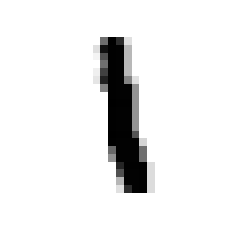

This is actually: 1


In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[6]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

print('This is actually:',y[6])

In [21]:
input_nodes = 784
hidden_nodes = 400
output_nodes = 10

learning_rate = 0.2

n = NeuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)



In [22]:
import numpy as np
for inputs,targets in zip(X,y):
    inputs_list = (inputs/255*0.99)+0.01
    targets_list = np.zeros(10)+0.01
    targets_list[int(targets)] = 0.99
    n.train(inputs_list,targets_list)
    pass

Testing

In [23]:
import pandas as pd
test_data = pd.read_csv('C:/Users/adbir/Data Science/Dataset/MNIST 100/mnist_test_10.csv',header=None)
#train_data.head()
print(test_data.shape)
X,y = test_data.iloc[:,1:].values,test_data.iloc[:,0].values
print(X.shape)
print(y.shape)
print(type(X))

(10, 785)
(10, 784)
(10,)
<class 'numpy.ndarray'>


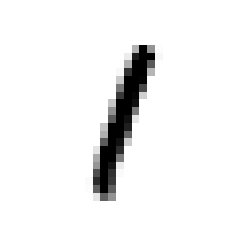

This is actually: 1


In [26]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[5]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

print('This is actually:',y[5])

In [35]:
test_inputs = ((some_digit/255*0.99)+0.01)
output = n.query(test_inputs)
print(output)
print("Final result is :",np.argmax(output))

[[2.09876559e-05]
 [9.29065168e-01]
 [5.68914930e-07]
 [2.10778976e-03]
 [1.94146896e-06]
 [2.96320443e-03]
 [1.13004609e-02]
 [1.85801062e-03]
 [3.71136265e-04]
 [5.86291990e-01]]
Final result is : 1


1